In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from cyberbullying.data import Data
from cyberbullying.models import MLModel, MLClassifier
from cyberbullying.utils import conf_mx_all
from sklearn.metrics import classification_report

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [4]:
import joblib

In [5]:
from sklearn import set_config
set_config(display='diagram')

In [6]:
data = Data().get_data(datasets='all')

dict_keys(['toxicity', 'aggression', 'twitter', 'twitter_racism', 'twitter_sexism', 'youtube', 'kaggle'])
['toxicity', 'aggression', 'twitter', 'twitter_racism', 'twitter_sexism', 'youtube', 'kaggle']


In [7]:
data

,text,target
0,This: :One can make an analogy in mathematical...,0.0
1,` :Clarification for you (and Zundark's righ...,0.0
2,Elected or Electoral? JHK,0.0
3,`This is such a fun entry. Devotchka I once...,0.0
4,Please relate the ozone hole to increases in c...,0.0
...,...,...
230944,"""Never really gave it much thought. I just fig...",0.0
230945,"""Nadie se salva de la regla 34 xd""",0.0
230946,"""Question: Are you a boy or a girl?""",0.0
230947,"""Leave your email or phone number and maybe yo...",1.0


In [8]:
percentage_used = 1
data = data.sample(frac=percentage_used, random_state=0)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data[['text']], data['target'], test_size=0.3, random_state=0)

In [10]:
X_train.head()

,text
41325,:Could I please be unblocked?
63081,**** Carlo you should not have given in to...
20725,` I have reverted a recent edit you made to th...
167785,*: I would be entirely in favor of someone m...
101388,` == Reviewer granted == Hello. Your accoun...


In [11]:
package_model = MLModel()

In [12]:
package_model.vectorizer

TfidfVectorizer(min_df=3)

In [13]:
package_model.model

LinearSVC(C=1, class_weight={0: 0.2, 1: 0.8}, dual=False, penalty='l1')

In [14]:
package_model.set_pipeline()

In [15]:
package_model.pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('cleandftransformer',
                                                                   CleanDFTransformer()),
                                                                  ('tfidfvectorizer',
                                                                   TfidfVectorizer(min_df=3))]),
                                                  ['text'])])),
                ('linearsvc',
                 LinearSVC(C=1, class_weight={0: 0.2, 1: 0.8}, dual=False,
                           penalty='l1'))])

In [16]:
from cyberbullying.transformers import CleanDFTransformer

In [17]:
X_train.shape

(161664, 1)

In [18]:
#transformer = CleanDFTransformer()

In [19]:
#X_train_2 = transformer.fit_transform(X_train)
#X_train_2

In [20]:
#X_train_2.shape

In [21]:
#X_train_2.isin([np.inf, -np.inf]).sum()

In [22]:
#X_train_2['text'].map(lambda text: type(text)).value_counts()

In [23]:
#X_train_2.isnull().sum()

In [24]:
y_train

41325     0.0
63081     0.0
20725     0.0
167785    0.0
101388    0.0
         ... 
136405    0.0
91714     0.0
180664    0.0
71438     1.0
124281    0.0
Name: target, Length: 161664, dtype: float64

In [25]:
y_train.isnull().sum()

0

In [26]:
#X_train_2['text'].sort_values()

In [27]:
#X_train_2['text'].map(lambda text: len(text)).sort_values()

In [28]:
#X_train_2.max()

In [29]:
#X_train_2.min()

In [30]:
y_train.min()

0.0

In [31]:
package_model.pipeline.fit(X_train, y_train) #deberia ser package_model.train(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('cleandftransformer',
                                                                   CleanDFTransformer()),
                                                                  ('tfidfvectorizer',
                                                                   TfidfVectorizer(min_df=3))]),
                                                  ['text'])])),
                ('linearsvc',
                 LinearSVC(C=1, class_weight={0: 0.2, 1: 0.8}, dual=False,
                           penalty='l1'))])

In [32]:
#package_model.save_model()

In [33]:
from cyberbullying.utils import clean_df

In [34]:
y_pred = package_model.predict(X_test)

In [35]:
y_pred

array([0., 1., 1., ..., 0., 0., 0.])

In [36]:
y_pred_proba = package_model.predict_proba(X_test)

In [37]:
y_pred_proba

array([[0.5091305 , 0.4908695 ],
       [0.32415139, 0.67584861],
       [0.38353477, 0.61646523],
       ...,
       [0.66721125, 0.33278875],
       [0.58771338, 0.41228662],
       [0.6474978 , 0.3525022 ]])

In [38]:
y_pred_proba[:,0]

array([0.5091305 , 0.32415139, 0.38353477, ..., 0.66721125, 0.58771338,
       0.6474978 ])

Recall: 0.733
Precision: 0.611
Accuracy: 0.913
F1-score: 0.666


(0.733, 0.611, 0.913, 0.666)

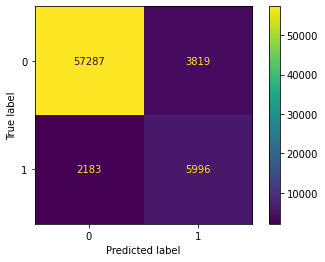

In [39]:
conf_mx_all(y_test, y_pred)

In [40]:
package_model.predict_all(X_test)

,text,proba_0,proba_1,prediction,color
216249,@mutaSawwif @TawheedNetwork_ Are you actually ...,0.509130,0.490870,0.0,None
200383,== Excuse you? == Did you just fart?,0.324151,0.675849,1.0,orange
29777,MY IP IS DYNAMIC AND MY PENIS IS 10 INCHES LONG,0.383535,0.616465,1.0,yellow
9952,"` Hi, , Welcome to Wikipedia! I hope you l...",0.781384,0.218616,0.0,None
72162,"` Please do not vandalize pages, as you did ...",0.747410,0.252590,0.0,None
...,...,...,...,...,...
19723,"My two demands are, leave the flagship alone...",0.450420,0.549580,1.0,yellow
49595,::Note that someone tossed the page up for d...,0.664955,0.335045,0.0,None
131669,` Only thing relevant here is but ``THE' SHIT...,0.667211,0.332789,0.0,None
84864,`right about the body though it's quite possib...,0.587713,0.412287,0.0,None


In [41]:
pd.DataFrame({'text': X_test['text'], 'target': y_test})[60:80]

,text,target
137792,` ::See in my userpage the Articles I've crea...,0.0
153873,== Transnistria == The recent addition to t...,0.0
53601,` Note also that the previously highlighted t...,0.0
205335,@Damhan97 @niall_cullen @AC360 Having more chi...,1.0
213374,RT @howlintwolf I swear it's not sexist but Ch...,1.0
159241,== Skywalk / new tourist attraction == Wire...,0.0
35902,"33, 2 March 2007 (UTC) ::::::::::::You are bei...",0.0
222384,"""@nilbymouth \\n\\nYou are right concerning Ca...",0.0
146068,` :::::ETTENTIO PLEASE ::``Israeli offensive...,0.0
202625,"Saudi cleric: ""sun revolves around the earth.""...",1.0


In [42]:
X_test.loc[210727, 'text']

'@discerningmumin So if you are against slavery, you cannot be a Muslim. So why are you crying about slavery when the Quran approves it?'

In [43]:
X_test.iloc[20,:]['text']

"`  :::Why is ``per second`` the most important measurement? That little factoid is about a policy which doesn't apply per second; it applies per month. Converting it to any other time frame makes it meaningless.   /  `"

In [44]:
#texto = '`   Please do not vandalize pages, as you did with this edit to Rhode Island. If you continue to do so, you will be blocked from editing.  \xa0–\xa0 `'

In [45]:
texto = X_test.loc[210727,:]['text']

In [46]:
package_model.predict(texto)

array([1.])

In [47]:
package_model.predict_proba(texto)

array([[0.3036623, 0.6963377]])

In [48]:
package_model.predict_simple_text(texto)

,text,proba_0,proba_1,prediction,color
0,@discerningmumin,0.648872,0.351128,0.0,None
1,So,0.648872,0.351128,0.0,None
2,if,0.648872,0.351128,0.0,None
3,you,0.648872,0.351128,0.0,None
4,are,0.648872,0.351128,0.0,None
5,against,0.648872,0.351128,0.0,None
6,"slavery,",0.465384,0.534616,1.0,yellow
7,you,0.648872,0.351128,0.0,None
8,cannot,0.648872,0.351128,0.0,None
9,be,0.648872,0.351128,0.0,None


In [49]:
test_html = package_model.predict_phrase(texto)
test_html

{'prediction': 1.0,
 'text': '@discerningmumin So if you are against <yellow>slavery,</yellow> you cannot be a <orange>Muslim.</orange> So why are you crying about <yellow>slavery</yellow> when the <yellow>Quran</yellow> approves it?'}

In [50]:
#package_model.predict_all(' Your a prick. keep your personal thoughts to your self. Jeff is the best driver ever and thats a fact. You musy be an idiot redneck.')

In [51]:
#package_model.predict_simple_text(' Your a prick. keep your personal thoughts to your self. Jeff is the best driver ever and thats a fact. You musy be an idiot redneck.')

In [52]:
from cyberbullying.utils import get_trained_model, save_trained_model

In [53]:
save_trained_model(package_model, 'model_prediction')

In [54]:
trained_model = get_trained_model('model_prediction')

In [55]:
trained_model

In [56]:
trained_model.predict(texto)

array([1.])

In [57]:
trained_model.predict_proba(texto)

array([[0.3036623, 0.6963377]])

In [58]:
trained_model.predict_phrase(texto)

{'prediction': 1.0,
 'text': '@discerningmumin So if you are against <yellow>slavery,</yellow> you cannot be a <orange>Muslim.</orange> So why are you crying about <yellow>slavery</yellow> when the <yellow>Quran</yellow> approves it?'}

# Classification

In [61]:
data_class = Data().get_data_classification()

In [62]:
data_class.head()

,text,type
7945,rape is real..zvasiyana nema jokes about being...,gender
7946,You never saw any celebrity say anything like ...,gender
7947,"@ManhattaKnight I mean he's gay, but he uses g...",gender
7948,RT @Raul_Novoa16: @AliciaBernardez @Alex_Aim @...,gender
7949,Rape is rape. And the fact that I read one pos...,gender


In [63]:
data_class.shape

(45094, 2)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(data_class[['text']], data_class['type'], test_size=0.3, random_state=0)

In [67]:
classifier_model = MLClassifier()

In [68]:
classifier_model

In [69]:
classifier_model.vectorizer

TfidfVectorizer(max_df=0.8, max_features=25000, min_df=10, ngram_range=(1, 2))

In [70]:
classifier_model.model

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=10)

In [71]:
classifier_model.set_pipeline()

In [72]:
classifier_model.pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('cleandftransformer',
                                                                   CleanDFTransformer()),
                                                                  ('tfidfvectorizer',
                                                                   TfidfVectorizer(max_df=0.8,
                                                                                   max_features=25000,
                                                                                   min_df=10,
                                                                                   ngram_range=(1,
                                                                                                2)))]),
                                                  ['text'])])),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                    n_estimators=10))])

In [73]:
classifier_model.train(X_train, y_train)

In [77]:
y_pred = classifier_model.predict(X_test)

In [78]:
y_pred

['ethnicity',
 'age',
 'gender',
 'ethnicity',
 'age',
 'ethnicity',
 'religion',
 'gender',
 'religion',
 'other',
 'religion',
 'religion',
 'religion',
 'ethnicity',
 'religion',
 'ethnicity',
 'other',
 'age',
 'other',
 'age',
 'age',
 'gender',
 'gender',
 'other',
 'ethnicity',
 'age',
 'gender',
 'other',
 'ethnicity',
 'other',
 'gender',
 'other',
 'gender',
 'ethnicity',
 'gender',
 'other',
 'religion',
 'gender',
 'other',
 'age',
 'age',
 'religion',
 'religion',
 'other',
 'other',
 'other',
 'ethnicity',
 'religion',
 'gender',
 'ethnicity',
 'religion',
 'ethnicity',
 'gender',
 'other',
 'gender',
 'religion',
 'age',
 'age',
 'gender',
 'other',
 'age',
 'gender',
 'other',
 'other',
 'religion',
 'religion',
 'other',
 'ethnicity',
 'religion',
 'age',
 'gender',
 'other',
 'age',
 'religion',
 'ethnicity',
 'religion',
 'gender',
 'religion',
 'age',
 'ethnicity',
 'age',
 'ethnicity',
 'age',
 'other',
 'ethnicity',
 'age',
 'religion',
 'ethnicity',
 'ethnicity',

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         age       0.99      0.98      0.98      2416
   ethnicity       0.91      0.78      0.84      2955
      gender       0.95      0.72      0.82      3424
       other       0.62      0.93      0.74      2332
    religion       0.84      0.87      0.85      2402

    accuracy                           0.84     13529
   macro avg       0.86      0.86      0.85     13529
weighted avg       0.87      0.84      0.85     13529



In [80]:
save_trained_model(classifier_model, 'model_classification')

In [81]:
trained_classifier_model = get_trained_model('model_classification')

In [82]:
trained_classifier_model

In [83]:
texto

'@discerningmumin So if you are against slavery, you cannot be a Muslim. So why are you crying about slavery when the Quran approves it?'

In [84]:
trained_classifier_model.predict(texto)[0]

'religion'